# Breast Cancer Data

### Basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# setting style
sns.set_style(style='whitegrid')

In [3]:
# loading data
from sklearn.datasets import load_breast_cancer

In [4]:
# setting up data
cancer = load_breast_cancer()

In [5]:
# checking keys
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [6]:
# setting and showing data frame
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension           ...             worst radius  \
0                 0.07871           ...                    25.38   
1                 0.05667           ...                    24.99   
2                 0.05999           ...                    23.57   
3                 0.09744           ...                    14.91   
4                 0.05883           ...                    22.54   

   worst texture  worst perimeter  worst area  worst smoothness  \
0          17.33           184.60      2019.0            0.1622   
1          23.41           158.80      1956.0            0.1238   
2          25.53           152.50      1709.0            0.1444   
3          26.50            98.87       567.7            0.2098   
4          16.67           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 30 columns]

In [7]:
# Saving target variable
y = cancer['target']

In [8]:
# setting as data frame
y = pd.DataFrame(y,columns=['target'])

In [9]:
# adding to df to balance sample
df['target'] = y['target']

## Balancing Sample

In [10]:
# :Class Distribution: 212 - Malignant, 357 - Benign
df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [11]:
# importing lib
from sklearn.utils import resample

In [12]:
# Separate majority and minority classes
df_majority = df[df.target==1]
df_minority = df[df.target==0]

In [13]:
# generating equal numbers of variables
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=357,
                                 random_state=123) 

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [14]:
# checking function
df_upsampled.target.value_counts()

1    357
0    357
Name: target, dtype: int64

## Logistic Regression Model

### Importing Model Libraries

In [15]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_predict
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
# setting up logistic regression model
lr = LogisticRegression()

In [17]:
# Separate input features (X) and target variable (y)
y = df_upsampled.target
X = df_upsampled.drop('target', axis=1)

# splitting data into test and training group
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Train model
lrc = LogisticRegression().fit(X_train, y_train)
 
# Predict on training set
cross_val_score(lrc, X, y, cv= 5)

array([ 0.97916667,  0.97222222,  0.95774648,  0.95774648,  0.94366197])

## RFE

### importing Libraries

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.feature_selection import RFE

In [19]:
# See all feature ranks
nfeatures = 1

In [20]:
# Setting Up Selector
rfe = RFE(lr,nfeatures)

In [21]:
# Fitting rfe
fit = rfe.fit(X,y)

In [22]:
# Display of Features Importants
result_RFE = pd.DataFrame(list(fit.ranking_),index=X.columns)

In [23]:
# displaying r score
lrc.score(X,y)

0.96358543417366949

In [24]:
# saving copy of ranked features
sorted_rfe = result_RFE[0].sort_values()

In [30]:
sorted_rfe.head(10)

worst concavity          1
worst concave points     2
mean concavity           3
worst compactness        4
worst radius             5
mean radius              6
mean concave points      7
mean symmetry            8
perimeter error          9
radius error            10
Name: 0, dtype: int64

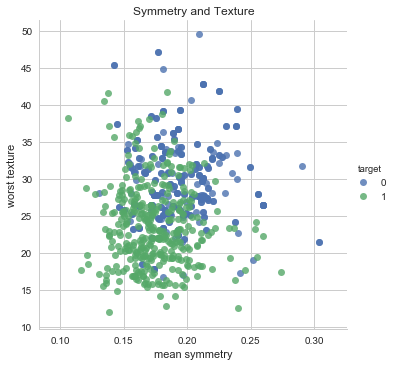

In [18]:
# lets plot some of the more important features with their class as a color
sns.lmplot('mean symmetry', 'worst texture', df_upsampled, hue='target',fit_reg=False)
plt.title('Symmetry and Texture')
plt.show()

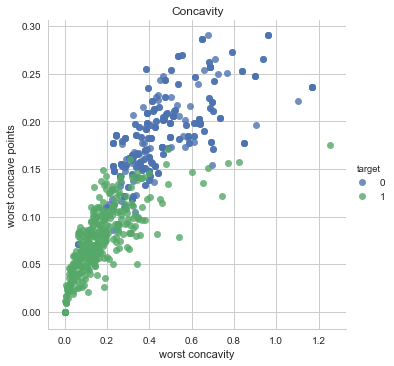

In [19]:
# lets plot some of the more important features with their class as a color
sns.lmplot('worst concavity', 'worst concave points', df_upsampled, hue='target',fit_reg=False)
plt.title('Concavity')
plt.show()

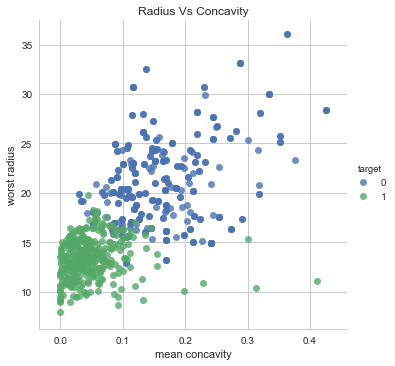

In [20]:
# lets plot some of the more important features with their class as a color
sns.lmplot('mean concavity', 'worst radius', df_upsampled, hue='target',fit_reg=False)
plt.title('Radius Vs Concavity')
plt.show()

From these plots, we can see how certain traits really affect our target class.  Giving us an affective way to predict which class each data point will belong to.

In [22]:
# taking 16 best features
RFE_x = df_upsampled[['mean radius','mean compactness','mean concavity',
                      'mean concave points','mean symmetry','radius error',
                      'texture error', 'perimeter error', 'area error',
                      'concave points error','worst radius','worst texture',
                      'mean texture','target']]

## Re-Fit Model

In [23]:
# Separate input features (X) and target variable (y)
y = df_upsampled.target
X = RFE_x.drop('target',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Train model
lrc = LogisticRegression().fit(X_train, y_train)
 
# Predict on training set
cross_val_score(lrc, X, y, cv= 5)

array([ 0.93055556,  0.92361111,  0.94366197,  0.94366197,  0.92253521])

In [24]:
# 14 features less and still 93%
lrc.score(X,y)

0.93837535014005602

We were able to remove 14 Features with out losing about 3% of the important data.

## Applying PCA

In [35]:
# standardizing data
ss = StandardScaler().fit_transform(X_train)

In [36]:
# using pca to select 2 components from our 14 remaining features
sklearn_pca = PCA(n_components=2)

# fitting our x training data to pca
Y_sklearn = sklearn_pca.fit_transform(ss)

# adding results to a new data frame
X_PCA = pd.DataFrame(Y_sklearn)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.51612427  0.15072042]


## Logistic Regression Model With PCA

In [31]:
# Train model
lrc = LogisticRegression().fit(X_PCA, y_train)
 
# Predict on training set
cross_val_score(lrc, X, y, cv= 5)

array([ 0.93055556,  0.92361111,  0.94366197,  0.94366197,  0.92253521])

### LR Analysis

Using a Regression model on this data was very helpful, when ranking and calculating the importants of each feature in the dataset. However, I think there are a couple of model that could predict the target class much more affectively.  Because, there could be a decent number of outlier that would make it hard to split the info at a single point.  Data points near the transition could cause a lot of problems for the model. 

## Random Forest Model

### Importing Libraries

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.grid_search import GridSearchCV

C:\Users\etallen127\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [33]:
# setting up random forest model
RFC = RandomForestClassifier()

In [34]:
# creating parameters to test
param_grid = {'n_estimators':[10,25,50,75,100,125,150,175,200,300,400,500]}

In [116]:
# fitting grid with setting
grid = GridSearchCV(RFC,param_grid,verbose=3)

In [118]:
# best parameter
grid.best_params_

{'n_estimators': 25}

In [122]:
# applying new parameter
RFC = RandomForestClassifier(n_estimators=25)

In [123]:
# testing model over 5 folds
cross_val_score(RFC.fit(X_PCA, y_train), X,y, cv=5)

array([ 0.96527778,  0.97222222,  0.98591549,  1.        ,  0.98591549])

### Analysis for Random Forest Model

Overall, I think this random forest model was a very good fit for this dataset.  I think there was a lot of information that could be used to  seperate the two classes.  So, with 25 estimators our model could predict what class a point belong to with near perfect accuracy.

## SVM

In [35]:
# Getting two more libs
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC

In [37]:
svc = SVC()

In [38]:
svc.fit(X_PCA, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [40]:
# setting grid search with model and params to test
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [42]:
grid.best_params_

{'C': 1000, 'gamma': 0.001}

In [43]:
# testing the grid predictions v test data
grid_pred = grid.predict(X_test)

In [44]:
# model evaluation
print(confusion_matrix(y_test,grid_pred))
print('\n')
print(classification_report(y_test,grid_pred))

[[110   4]
 [  3 119]]


             precision    recall  f1-score   support

          0       0.97      0.96      0.97       114
          1       0.97      0.98      0.97       122

avg / total       0.97      0.97      0.97       236



### Support Vector Machine Analysis

After testing the support vector classifier, the model only miss classified 7 points out of the 236 tested, giving it about 97% accuracy.  It had about the same number of type 1 errors and type 2 errors, which is good it is not heavily favoring one outcome.  Overall, I think this data fits this model very nicely.  There are plenty of divides between the two classes, so it can use those points to split the data. Helping the model make more accurate classifications.

## KNN Model

In [46]:
from sklearn import neighbors

In [47]:
KNN = neighbors.KNeighborsClassifier()

In [48]:
param_grid = {'n_neighbors':[1,3,5,10,15,20,25,30,40,50,75,100],
              'weights':['uniform','distance']}

In [49]:
# setting grid search with model and params to test
grid = GridSearchCV(KNN,param_grid,verbose=3)

In [51]:
grid.best_params_

{'n_neighbors': 25, 'weights': 'distance'}

In [53]:
grid.best_score_

0.9351464435146444

### Analysis for KNN Model

Although this model was able to get up to about 93%, I don't think it is a very good fit for this data.  There was some clustering in the classes but there was also a lot of overlap.  Which can create confusion in this type of model.

# Conclusion

In this journal, we were able to train multiple models to accurately predict weither a beast lump was Malignant or Benign.  Starting with a logistic regression model, we were able to find our features coefficents and rank our features by importants. Then we were able to remove 14 features.  After that, we used principal component analysis to reduce our remaining 16 features into 2 components.  With these two components, we were able to update our regression model to have arounnd 93% accuracy, while reducing over fitting.  Then applying our 2 components to a Random Forest model, we could improve our accuracy even further getting up to about 98% accuracy.  After that, we used our components to fit a support vector classifier reaching 97% accuracy.  Last, we applied our data to a K-Nearest-Neighbors model which we trained to 93.% accuracy.  Overall, I think a random forest model and a support vector classifier are the best fit for this type of data.  From the features we plotted earlier.  We can see clear splits between the target classes.  Which is perfect for a svm and gives the random forest model plenty to work with as well.